## Задача 1.

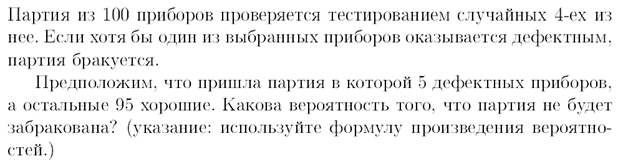


Вероятность, что партия не будет забракована:
Выбираем первую деталь, вероятность, что она не забракована 95/100:

95 - хороших деталей, 100 - всего.

Далее выбираем вторую, 94/99 (одну хорошую деталь уже забрали) и т.д.

Нас устраивает вариант, когда все последовательно вынимаемые детали являются хорошими. Значит, общая вероятность будет произведением вероятностей вынимания последовательно хороших деталей.

$$P(A) = {95\over100} * {94\over99}*{93\over98}*{92\over97}\approx0.812$$

## Задача 2.

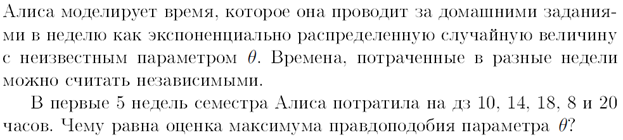

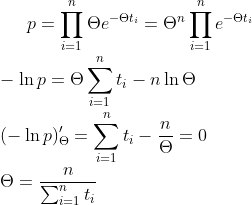

Формула правдоподобия:
$$ L(x_{1},x_{2},...,x_{n};\Theta) = p(x_{1};\Theta)p(x_{2};\Theta)...p(x_{n};\Theta)=\prod\limits_{i=1}^{n} \Theta e^{- \Theta x_{i}}$$

$$ -ln(L) = \Theta \sum\limits_{i=1}^{n} x_{i} - n ln(\Theta)$$

$$ \acute{-ln(L)}_{\Theta} = 0$$

$$ \sum\limits_{i=1}^{n} x_{i} - {n\over\Theta} = 0$$

$$ \Theta = {n\over\sum\limits_{i=1}^{n} x_{i}}$$

где:

n=5 (количество недель),

$\sum\limits_{i=1}^{n} x_{i} = 10 + 14 + 18 + 8 + 20 = 70$

Тогда:

$ \Theta = {5\over70} \approx 0.07142857$



## Задача 3.
в конце ноутбука

## Задача 4.

In [48]:
# библиотека для работы с табличными данными
import pandas as pd
# библиотека для вычислений
import numpy as np


# для визуализации
import seaborn as sns
sns.set()

# скрываем предупреждения
import warnings
warnings.filterwarnings("ignore")

2)	Посчитать долю значений целевого признака (target=1) в разрезе категорий образования.

In [49]:
from sqlalchemy import create_engine
# создаем окружение на локальной машине
engine = create_engine('sqlite://', echo=False)

#считываем данные
df = pd.read_csv('appl_score_sample.csv', delimiter=';')

# создаем локальную базу данных
df.to_sql('users', con=engine)

# смотрим таблицу
engine.execute("SELECT * FROM users").fetchall()

# смотрим столбцы
print(engine.execute("PRAGMA table_info(users);").fetchall())



[(0, 'index', 'BIGINT', 0, None, 0), (1, 'CLIENT_ID', 'BIGINT', 0, None, 0), (2, 'SEX', 'BIGINT', 0, None, 0), (3, 'CHILD_FLAG', 'BIGINT', 0, None, 0), (4, 'REALTY_FLAG', 'BIGINT', 0, None, 0), (5, 'ACCOUNTS_FLAG', 'BIGINT', 0, None, 0), (6, 'E_MAIL_FLAG', 'BIGINT', 0, None, 0), (7, 'DCI', 'FLOAT', 0, None, 0), (8, 'PROFIT_FAMILY', 'FLOAT', 0, None, 0), (9, 'UCI', 'FLOAT', 0, None, 0), (10, 'FOREIGN_PASSPORT_FLAG', 'BIGINT', 0, None, 0), (11, 'STANDING_IN_MONTHS_LAST', 'BIGINT', 0, None, 0), (12, 'EDUCATION', 'BIGINT', 0, None, 0), (13, 'TRANSPORT_AMOUNT', 'BIGINT', 0, None, 0), (14, 'target', 'BIGINT', 0, None, 0)]


In [50]:
df.shape

(2163, 14)

In [51]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1


**1)Количество уникальных/неуникальных Client_id.**

**Решение:**

Создаем два подзапроса: в обоих группируем данные по client_id, агрегируем эти данные в COUNT(client_id). И в первом фильтруем с помощью HAVING(фильтр для сгруппированных данных), чтобы COUNT(client_id) был больше 1 (неуникальные), во втором COUNT(client_id)=1. И соединяем два запроса с помощью UNION ALL


In [52]:
engine.execute("SELECT COUNT(t1.CLIENT_ID) FROM (SELECT CLIENT_ID, COUNT(CLIENT_ID) FROM users GROUP BY CLIENT_ID HAVING COUNT(CLIENT_ID) > 1) as t1 UNION ALL SELECT COUNT(t2.CLIENT_ID) FROM (SELECT CLIENT_ID, COUNT(CLIENT_ID) FROM users GROUP BY CLIENT_ID HAVING COUNT(CLIENT_ID) = 1) as t2").fetchall()

[(1,), (2161,)]

In [53]:
# получается 2161 уникальных значений, 2 значения схлопнулись в одно неуникальное
engine.execute("SELECT COUNT(*) FROM users;").fetchall() 

[(2163,)]

**2)Посчитать долю значений целевого признака (target=1) в разрезе категорий образования.**

**Решение:** 

Фильтруем данные по target=1 (WHERE), группируем по образованию (GROUP BY) и агрегируем в количество позиций (COUNT(*)), прибавляем к нему 0.0, чтобы значение было не целочисленное.

Агрегированное число делим на общее число позиций для target=1.

In [54]:
# получаем доли по всем семи типам обучения для target=1. "-1"-ого типа в текущих данных нет
engine.execute("SELECT EDUCATION, (COUNT(*) + 0.0)/ Total FROM users, (SELECT COUNT(*) Total FROM users WHERE target = 1) TMP WHERE target = 1 GROUP BY EDUCATION").fetchall()  


[(1, 0.0018484288354898336),
 (2, 0.012014787430683918),
 (3, 0.20517560073937152),
 (4, 0.17190388170055454),
 (5, 0.38724584103512016),
 (6, 0.2144177449168207),
 (7, 0.0073937153419593345)]

**3)На сколько в среднем доход семьи заемщиков с Client_id=2n, больше дохода семьи заемщиков с Client_id=2n+1, где n - произвольное целое число.**

**Решение:**

Формируем два слайса для четных и нечетных значений client_id. Вычитаем один из другого. И применяем AVG(), чтобы найти среднее число от разницы.

In [55]:
# четный слайс client_id
engine.execute("SELECT client_id,PROFIT_FAMILY FROM users WHERE client_id%2 = 0").fetchall() 

[(2, 33312.8594),
 (4, 28738.4707),
 (6, 37000.0),
 (8, 17400.0),
 (10, 30000.0),
 (12, 11000.0),
 (14, 110000.0),
 (16, 18300.0),
 (18, 38920.0),
 (20, 38310.0),
 (22, 23872.0),
 (24, 17000.0),
 (26, 34000.0),
 (28, 15050.7402),
 (30, 12798.46),
 (32, 31758.4102),
 (34, 18050.6094),
 (36, 28197.5),
 (38, 18657.4902),
 (40, 30000.0),
 (42, 33200.0),
 (44, 40000.0),
 (46, 110000.0),
 (48, 164399.1719),
 (50, 23742.4102),
 (52, 7684.29),
 (54, 12933.5098),
 (56, 71800.0),
 (58, 19886.2305),
 (60, 7003.98),
 (62, 10005.0),
 (64, 32700.0),
 (66, 10000.0),
 (68, 34052.0),
 (70, 33204.3281),
 (72, 78923.7969),
 (74, 50481.9688),
 (76, 10209.1104),
 (78, 17116.9102),
 (80, 220000.0),
 (82, 85230.5391),
 (84, 67597.6562),
 (86, 17817.6797),
 (88, 40000.0),
 (90, 4222.3999),
 (92, 34000.0),
 (94, 8000.0),
 (96, 59150.0),
 (98, 84800.0),
 (100, 30000.0),
 (102, 15990.0),
 (104, 65000.0),
 (106, 24193.4297),
 (108, 23000.0),
 (110, 12829.46),
 (112, 42000.0),
 (114, 25000.0),
 (116, 16820.0),
 (1

In [56]:
# нечетный слайс client_id
engine.execute("SELECT client_id, PROFIT_FAMILY FROM users WHERE client_id%2 = 1").fetchall() 

[(1, 14370.2002),
 (3, 34729.5117),
 (5, 73310.0),
 (7, 16243.8096),
 (9, 48383.8203),
 (11, 25000.0),
 (13, 36000.0),
 (15, 17100.0),
 (17, 40000.0),
 (19, 60000.0),
 (21, 7833.1299),
 (23, 26000.0),
 (25, 17000.0),
 (27, 40000.0),
 (29, 60000.0),
 (31, 50000.0),
 (33, 48000.0),
 (35, 100000.0),
 (37, 11201.0801),
 (39, 37800.0),
 (41, 25549.4707),
 (43, 22107.3906),
 (45, 7057.1499),
 (47, 100460.0),
 (49, 23884.2207),
 (51, 15000.0),
 (53, 45000.0),
 (55, 75000.0),
 (57, 39313.1484),
 (59, 18399.0),
 (61, 12649.4297),
 (63, 19549.0098),
 (65, 20169.0898),
 (67, 75800.9531),
 (69, 28994.3301),
 (71, 24180.0),
 (73, 12500.0),
 (75, 22922.5605),
 (77, 12020.6396),
 (79, 32000.0),
 (81, 17400.0),
 (83, 17700.0),
 (85, 19443.9199),
 (87, 7123.6699),
 (89, 51000.0),
 (91, 23322.5801),
 (93, 30000.0),
 (95, 22330.0),
 (97, 10252.9199),
 (99, 35000.0),
 (101, 15000.0),
 (103, 24000.0),
 (105, 85000.0),
 (107, 18000.0),
 (109, 6357.0801),
 (111, 89150.0),
 (113, 18785.4707),
 (115, 21444.669

In [95]:
# ответ
engine.execute("SELECT AVG(pr_fam_chet - PROFIT_FAMILY) \ 
                FROM users,(SELECT PROFIT_FAMILY as pr_fam_chet FROM users WHERE client_id%2 = 0) chet  WHERE client_id%2 = 1").fetchall() 

SyntaxError: EOL while scanning string literal (<ipython-input-95-a0ca05418a89>, line 2)

## Задача 5.

1)	В dataframe с именем subset_1 сохраните только первые 20 строк и только 1 и 5 колонку.

2)	В dataframe subset_2 сохраните только тех клиентов-мужчин, у которых значения переменной STANDING_IN_MONTHS_LAST строго больше 50.

3)	Создайте две новые переменных:
CI = DCI + UCI
CI_ln = натуральный логарифм переменной CI.

4)	Для данных рассчитайте среднее значение переменной CI для каждого типа образования (переменная EDUCATION), в получившемся dataframe переменная EDUCATION не должна превратиться в индекс. Также переименуйте колонку со средним значением CI в MEAN_CI.

5)	В переменной TRANSPORT_AMOUNT замените все отрицательные значения на медианное значение переменной TRANSPORT_AMOUNT (без учета отрицательных значений, разумеется).


In [58]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,3,1,1
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,3,2,1
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,3,0,1
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,3,0,1


### 1)	
В dataframe с именем subset_1 сохраните только первые 20 строк и только 1 и 5 колонку.

In [59]:
# выбираем через iloc 20 строк из первого и пятого столбца
subset_1 = df.iloc[:20, [0,4]]
subset_1.head()

,CLIENT_ID,ACCOUNTS_FLAG
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### 2)
В dataframe subset_2 сохраните только тех клиентов-мужчин, у которых значения переменной STANDING_IN_MONTHS_LAST строго больше 50.

In [60]:
# фильруем мужчин == 1 и по "стаж работы на последнем месте" (больше 50)
subset_2 = df[(df.SEX == 1) & (df.STANDING_IN_MONTHS_LAST > 50)]
subset_2.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,3,0,1
6,7,1,0,1,1,0,0.0000,16243.8096,7000.0,0,71,5,1,1
7,8,1,1,1,0,0,17400.0000,17400.0000,0.0,0,59,3,3,1
8,9,1,1,1,0,0,33383.8203,48383.8203,0.0,0,228,5,0,1
12,13,1,0,1,0,0,16504.9004,36000.0000,0.0,0,90,6,1,1


In [61]:
# проверка
subset_2.SEX.value_counts()

1    323
Name: SEX, dtype: int64

### 3)
Создайте две новые переменных:
CI = DCI + UCI

CI_ln = натуральный логарифм переменной CI.

In [62]:
# складываем два столбца DCI и UCI
df["CI"] = df["DCI"] + df["UCI"]

# логорифмируем по новому столбцу CI и записываем в столбец CI_ln
df["CI_ln"] = np.log(df["CI"])

In [63]:
# проверка
df[df["UCI"] > 0].head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target,CI,CI_ln
6,7,1,0,1,1,0,0.0000,16243.8096,7000.0,0,71,5,1,1,7000.0000,8.853665
15,16,1,1,0,0,0,16267.8398,18300.0000,2000.0,0,20,5,1,1,18267.8398,9.812897
19,20,1,1,0,0,0,8307.7803,38310.0000,10000.0,0,114,5,0,1,18307.7803,9.815081
21,22,0,0,0,0,0,8872.0000,23872.0000,15000.0,1,13,6,0,1,23872.0000,10.080462
24,25,0,0,0,0,0,20490.4902,17000.0000,2000.0,0,49,4,0,1,22490.4902,10.020848


### 4)
Для данных рассчитайте среднее значение переменной CI для каждого типа образования (переменная EDUCATION),

в получившемся dataframe переменная EDUCATION не должна превратиться в индекс.

Также переименуйте колонку со средним значением CI в MEAN_CI.

In [64]:
# группируем по столбцу EDUCATION и агрегируем CI в среднее значение.
# cразу сбрасываем индексы, чтобы EDUCATION была в отдельном столбце, а не как индекс
df_ci_by_ed = df.groupby('EDUCATION').agg({"CI":'mean'}).reset_index()

# переименовываем в сгруппированном df столбец CI на MEAN_CI
df_ci_by_ed = df_ci_by_ed.rename(columns={"CI": "MEAN_CI"})

# проверка
df_ci_by_ed

,EDUCATION,MEAN_CI
0,1,53619.594300
1,2,54825.425270
2,3,36233.867539
3,4,19460.352806
4,5,19222.891376
5,6,16195.841409
6,7,16083.252920


### 5)
В переменной TRANSPORT_AMOUNT замените все отрицательные значения на медианное значение переменной TRANSPORT_AMOUNT (без учета отрицательных значений, разумеется).

In [65]:
# отрицательные значения не найдены
df[df["TRANSPORT_AMOUNT"] < 0]

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target,CI,CI_ln


In [66]:
# проверка
df["TRANSPORT_AMOUNT"].value_counts()

0    1687
1     446
2      28
3       2
Name: TRANSPORT_AMOUNT, dtype: int64

In [67]:
# считываем новые данные
df_new = pd.read_csv('appl_score_sample_new.csv', delimiter=';')

In [68]:
# видим отрицательные значения
df_new["TRANSPORT_AMOUNT"].value_counts()

 0    1681
 1     446
 2      28
-1       3
 3       2
-2       2
-3       1
Name: TRANSPORT_AMOUNT, dtype: int64

In [69]:
# находим медианное значение для неотрицательных значений. Оно равно 0
# Достаточно предсказуемо, большой перекос выборки в пользу TRANSPORT_AMOUNT==0, 1681 значение (ячейка сверху)
df_new.loc[df_new["TRANSPORT_AMOUNT"] >= 0, "TRANSPORT_AMOUNT"].median()

0.0

In [70]:
df_new.loc[df_new["TRANSPORT_AMOUNT"] < 0, "TRANSPORT_AMOUNT"] = df_new.loc[df_new["TRANSPORT_AMOUNT"] >= 0, "TRANSPORT_AMOUNT"].median()

In [71]:
df_new["TRANSPORT_AMOUNT"].value_counts()

0.0    1687
1.0     446
2.0      28
3.0       2
Name: TRANSPORT_AMOUNT, dtype: int64

## Задача 3.

Необходимо любым способом (на выбор кандидата) с наибольшей точностью с помощью этой информации спрогнозировать целевой признак Тarget (бинарный признак 1/0). 

1)	Выбор метода моделирования и итоговой модели обосновать. Обоснование необходимо сделать по максимально возможному количеству критериев.
2)	Является ли Ваш прогноз стабильным? Не переобучили ли Вы модель? (обосновать)


In [72]:
df.EDUCATION.value_counts()

5    811
3    678
6    353
4    264
2     40
7     10
1      7
Name: EDUCATION, dtype: int64

1 - ученая степень/MBA

2 - второе высшее

3 - высшее;

4 - неоконченное высшее;

5 - - среднее специальное

6 - среднее;

7 - ниже среднего;

-1 - не указано


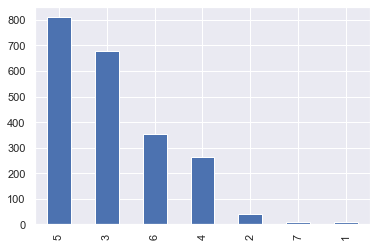

In [73]:
## смотрим распределение по образованию. Создалось впечатление, что некоторые типы образований можно объеденить для будущей модели
df_count_ed = df.EDUCATION.value_counts()
df_count_ed.plot.bar(x=df_count_ed.index)

In [74]:
# создаем df для того, чтобы посмотреть распределение target по образованию
df_count_ed_tar = df.groupby(by=['EDUCATION', 'target']).agg('count').reset_index()
df_count_ed_tar = df_count_ed_tar.iloc[:, :3]
df_count_ed_tar = df_count_ed_tar.rename(columns={"CLIENT_ID": "count_cl"})
df_count_ed_tar

,EDUCATION,target,count_cl
0,1,0,5
1,1,1,2
2,2,0,27
3,2,1,13
4,3,0,456
5,3,1,222
6,4,0,78
7,4,1,186
8,5,0,392
9,5,1,419


In [75]:
# библиотеки для визуализации
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [76]:
# вырезка визуализации из курса ml.ai
# Create a line (trace) for the global sales
trace0 = go.Bar(
    x=df_count_ed_tar.EDUCATION[df_count_ed_tar.target == 1],
    y=df_count_ed_tar[df_count_ed_tar.target == 0]['count_cl'],
    name='0'
)

# Create a line (trace) for the number of games released
trace1 = go.Bar(
    x=df_count_ed_tar.EDUCATION[df_count_ed_tar.target == 1],
    y=df_count_ed_tar[df_count_ed_tar.target == 1]['count_cl'],
    name='1'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Как ведет себя target относительно образования'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [77]:

# видим, что 1, 2 и 3ий тип образования ведут себя очень похоже. Как и 6 с 7ым (тут есть сомнения, попробуем по разному(возможно седьмой лучше вообще выбросить)).
# Попробуем объеденить их в две группы
df['EDUCATION'] = df['EDUCATION'].map({1:1, 2:1, 3:1, 4:2, 5:3, 6:4, 7:4})
df.EDUCATION.value_counts()


3    811
1    725
4    363
2    264
Name: EDUCATION, dtype: int64

In [78]:
# создаем df для того, чтобы посмотреть распределение target по полу клиента
df_count_sex_tar = df.groupby(by=['SEX', 'target']).agg('count').reset_index()
df_count_sex_tar = df_count_sex_tar.iloc[:, :3]
df_count_sex_tar = df_count_sex_tar.rename(columns={"CLIENT_ID": "count_sex"})
df_count_sex_tar

,SEX,target,count_sex
0,0,0,610
1,0,1,488
2,1,0,471
3,1,1,594


In [79]:
# вырезка визуализации из курса ml.ai
# Create a line (trace) for the global sales
trace0 = go.Bar(
    x=df_count_sex_tar.SEX[df_count_ed_tar.target == 1],
    y=df_count_sex_tar[df_count_ed_tar.target == 0]['count_sex'],
    name='0'
)

# Create a line (trace) for the number of games released
trace1 = go.Bar(
    x=df_count_sex_tar.SEX[df_count_ed_tar.target == 1],
    y=df_count_sex_tar[df_count_ed_tar.target == 1]['count_sex'],
    name='1'
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {'title': 'Как ведет себя target относительно пола клиента'}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [80]:
# видим, что есть отлчия по target относительно пола клиента

In [81]:
# выборка по target достаточно сбалансированная
df.groupby('target').count()["CLIENT_ID"].reset_index()

,target,CLIENT_ID
0,0,1081
1,1,1082


1 тип - это высшее образование
2 тип - неоконченное высшее
3 - среднее специальное
4 - среднее

In [82]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target,CI,CI_ln
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,1,1,1,14370.2002,9.572912
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,1,2,1,28312.8594,10.251071
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,1,0,1,34729.5117,10.455345
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,1,0,1,28738.4707,10.265992
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,1,0,1,73310.0000,11.202452


In [83]:
# переменная CI_ln имеет нормальное распределение, будем использовать её вместо DCI и UCI.
# Некоторые значения CI_ln==бесконечности. Их совсем немного, попробуем их выбросить (скорее всего их нужно рассматривать отдельно)
df["CI_ln"].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True,subset=["CI_ln"])

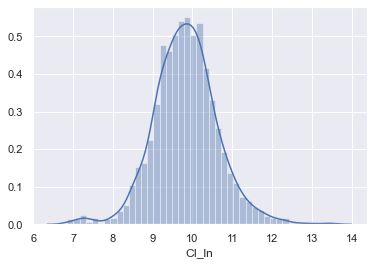

In [84]:
sns.distplot(df["CI_ln"].replace([np.inf, -np.inf], np.nan))

In [85]:
df.head()

,CLIENT_ID,SEX,CHILD_FLAG,REALTY_FLAG,ACCOUNTS_FLAG,E_MAIL_FLAG,DCI,PROFIT_FAMILY,UCI,FOREIGN_PASSPORT_FLAG,STANDING_IN_MONTHS_LAST,EDUCATION,TRANSPORT_AMOUNT,target,CI,CI_ln
0,1,1,0,1,0,1,14370.2002,14370.2002,0.0,0,26,1,1,1,14370.2002,9.572912
1,2,1,1,1,0,0,28312.8594,33312.8594,0.0,1,19,1,2,1,28312.8594,10.251071
2,3,1,0,0,0,1,34729.5117,34729.5117,0.0,0,66,1,0,1,34729.5117,10.455345
3,4,0,0,0,0,0,28738.4707,28738.4707,0.0,0,20,1,0,1,28738.4707,10.265992
4,5,0,1,0,0,0,73310.0000,73310.0000,0.0,0,25,1,0,1,73310.0000,11.202452


In [86]:
# проверка
df.shape, df["CI_ln"].isna().shape

((2021, 16), (2021,))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2162
Data columns (total 16 columns):
CLIENT_ID                  2021 non-null int64
SEX                        2021 non-null int64
CHILD_FLAG                 2021 non-null int64
REALTY_FLAG                2021 non-null int64
ACCOUNTS_FLAG              2021 non-null int64
E_MAIL_FLAG                2021 non-null int64
DCI                        2021 non-null float64
PROFIT_FAMILY              2021 non-null float64
UCI                        2021 non-null float64
FOREIGN_PASSPORT_FLAG      2021 non-null int64
STANDING_IN_MONTHS_LAST    2021 non-null int64
EDUCATION                  2021 non-null int64
TRANSPORT_AMOUNT           2021 non-null int64
target                     2021 non-null int64
CI                         2021 non-null float64
CI_ln                      2021 non-null float64
dtypes: float64(5), int64(11)
memory usage: 268.4 KB


In [88]:
# profit_family решил тоже убрать из выборки. Есть предположение, что оно не сильно влияет
X = df.drop(["DCI", "UCI", "PROFIT_FAMILY", "CI", "target"], axis=1)
X.head()
y = df["target"]

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# делим наши данные. обучаемся на 0.7 от выборки, тестируем на 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:
# делаем предсказание на тестовых данных
predictions = logreg.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
# получился очень хороший score. Когда убирал CI_ln и оставлял DCI и UCI, то f1 был равен 0.91
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       310
           1       0.96      0.99      0.98       297

    accuracy                           0.98       607
   macro avg       0.98      0.98      0.98       607
weighted avg       0.98      0.98      0.98       607



In [93]:
# смотрим какой класс алгоритм находит хуже. Нулевой
confusion_matrix(y_test,predictions)

array([[299,  11],
       [  3, 294]], dtype=int64)

### Вывод:

Отдельно, конечно, нужно посмотреть выброшенные значения, где CL_ln == бесконечности.

1)Я выбрал логистическую регрессию, она хорошо справляется с бинарной классификацией. Предполагаю, что признаки линейно зависимы, значит логистическая регрессия хорошо справится с этой задачей.

2)Исходная выборка достаточно сбалансирована, поэтому бороться с переобучением почти не пришлось. Можно было бы применить SMOTE, попробовать регуляризацию.
